In [1]:
from setproctitle import setproctitle
setproctitle("LFFF")

In [2]:
import numpy as np

Nx = 32
Ny = 32
Nz = 32

x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
z = np.linspace(-1, 1, Nz)

xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')

In [3]:
Bx = 0 + 0*xv
By = 0 + 0*xv
Bz = 1 + 0*xv

B = np.stack([Bx, By, Bz], axis=-1)

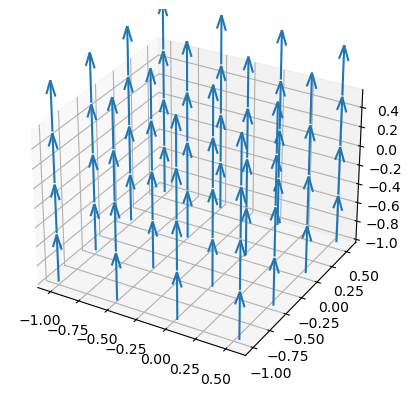

In [6]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
n = 8
ax.quiver(xv[::n, ::n, ::n], yv[::n, ::n, ::n], zv[::n, ::n, ::n],
          Bx[::n, ::n, ::n], By[::n, ::n, ::n], Bz[::n, ::n, ::n], 
          length=0.5, normalize=True)

In [7]:
import pyvista as pv
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [8]:
mesh = pv.StructuredGrid(xv, yv, zv)
vector = B.transpose(2, 1, 0, 3).reshape(-1, 3)
magnitude = np.linalg.norm(vector, axis=-1)
mesh['B'] = vector
mesh['magnitude'] = magnitude
mesh.active_vectors_name = 'B'
mesh.active_scalars_name = 'magnitude'

In [9]:
mesh

StructuredGrid (0x7f6a28a8ff40)
  N Cells:      29791
  N Points:     32768
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     -1.000e+00, 1.000e+00
  Dimensions:   32, 32, 32
  N Arrays:     2

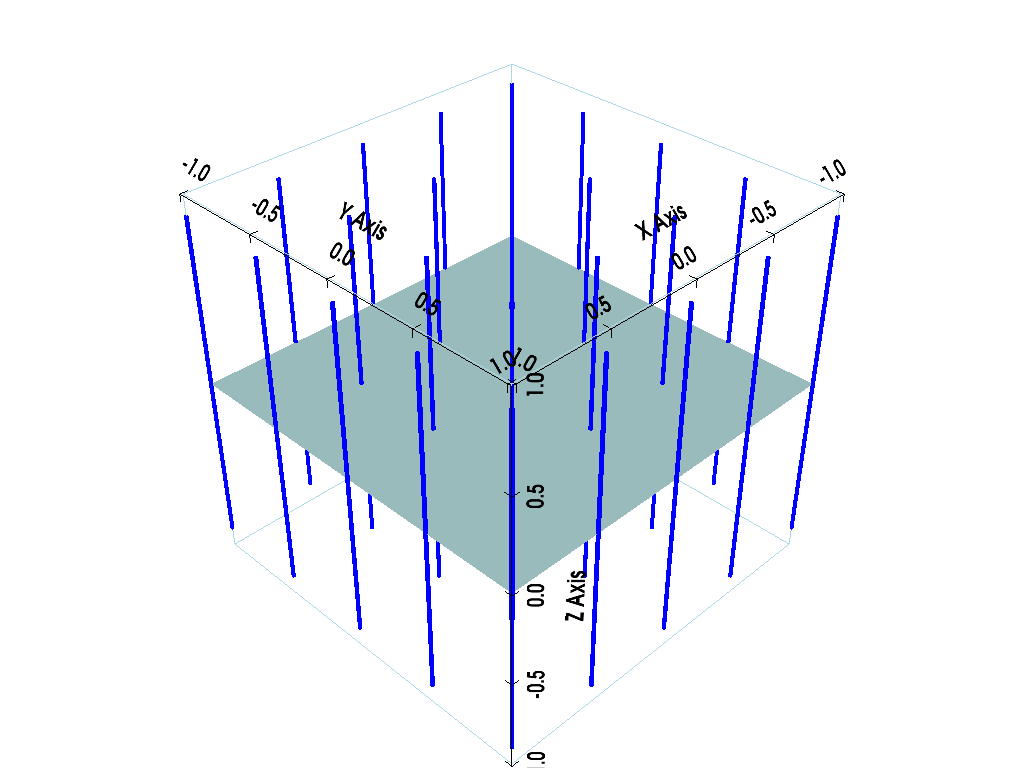

In [12]:
p = pv.Plotter()
p.show_bounds()
p.add_mesh(mesh.outline())

seed = pv.Plane(center=(mesh.center[0], mesh.center[1], 0), direction=(0, 0, 1),
                i_size=2, j_size=2, i_resolution=4, j_resolution=4)
p.add_mesh(seed)

strl = mesh.streamlines_from_source(seed, vectors='B',
                                    max_time=180, initial_step_length=0.1, integration_direction='both')
p.add_mesh(strl.tube(radius=0.01), 
           lighting=False, color='blue')

p.show()

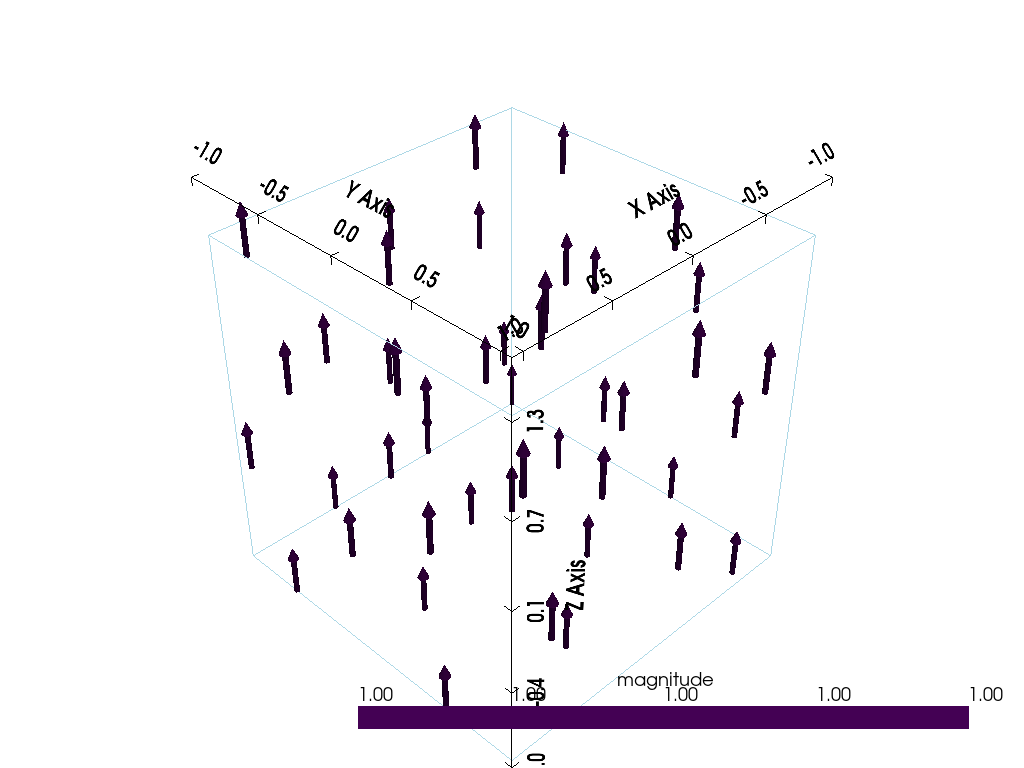

In [13]:
p = pv.Plotter()
p.show_bounds()
p.add_mesh(mesh.outline())

glyphs = mesh.glyph(orient="B", scale="magnitude", factor=0.3, geom=pv.Arrow(), tolerance=0.2)
p.add_mesh(glyphs)

p.show()